In [35]:

import matplotlib.pyplot as plt
import pickle
import numpy as np
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [54]:


# filepath = sys.argv[1]
stim_type = 'smooth'
# param = sys.argv[3]
# val = sys.argv[4]
# par = f'{param}_{val}'

net = 'Reciporcal_mono_linear_heavy_maxan_equalweight/noGCGainControl'

# load dataframe 
response_data = pd.read_csv(f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/{net}/responses_RG_nB.csv')


# load dataframe 
df = pd.read_csv(f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/{net}/anticipation_data_nB.csv')


print(df.columns)

# calculate anticipation with respect to V_drive
df['ant_RG_drive_time']  =  df['peak_drive'] - df['peak_RG'] 
df['ant_RG_drive_space'] = df['ant_RG_drive_time']* df['speed']

# calculate anticipation with respect to 
df['ant_RG_bar_time']  = df['tp_rf_GC_mid'] - df['peak_RG'] 
df['ant_RG_bar_space'] = df['ant_RG_bar_time']* df['speed']

df['taunBr']= df['taunB'].round(3)
# multiple heatmaps, keeping w+ fixed and changing w-
#dfgrouped = df.groupby(['wAB'])


speeds = df['speed'].unique()#[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0]





Index(['Unnamed: 0', 'wBA', 'wAB', 'tauA', 'tauB', 'speed', 'peak_RG',
       'peak_RB', 'peak_drive', 'tp_rf_GC_mid', 'peak_RG_pooling',
       'peak_RB_pooling', 'onset_RB', 'onset_RG', 'betaB', 'kratio', 'krecB',
       'krelB', 'neqB', 'nminB', 'onset_RB_pooling', 'onset_RG_pooling',
       'taunB'],
      dtype='object')


In [55]:
#load params 
fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/{net}/params_grid'
            
with open(fp, 'rb') as handle:
    paramsi = pickle.load(handle)

    for key in paramsi.keys():
        print(f'{key}')
        print(paramsi[key])

nb_cells
300
nb_GC_cells
300
saving_range
50
rf_BC
0.30000000000000004
rf_BC_s
1.2000000000000002
rf_GC
0.39
rf_GC_s
2.91
std_GC
0.065
std_GC_s
0.48500000000000004
speed
2.0
spacing
0.005
dt
0.001
stimulus_polarity
1
stop_pos
None
w_BC
0.4
w_GC
0.0
X0
0
tauA
0.28
tauA2
0.3
tauB
0.008
tauG
0.01
tauOPL
0.04
tauOPL2
0.0876
SF
0.0
input_scale
0.1
wAB
46.0
wBA
46.0
wA2B
46.0
wA2A
0
wAA2
0.0
wBA2
46.0
wGB
0.04
wGA
0.0
wGA2
0.0
d
1
rectification_BC
True
slope_BC
1
threshold_BC
0
rectification_AC
True
slope_GC
1110
threshold_GC
0.0
rectification_n
True
slope_n
1
threshold_n
0.0
plastic_to_G
True
plastic_to_A
True
krecB
0.5
krelB
1.0
betaB
10.0
krecA
0.1
krelA
0.1
betaA
0
krecA2
0.1
krelA2
0.1
betaA2
0
tauActB
0.12
hB
0
tauActA
0.1
hA
0.0
tauActG
0.1995
hG
0.0
distance
1.5
duration
0.75
rf_overlap
60.20000000000001
cell_spacing
0.0049833887043189366
tps
750
std
0.025000000000000005
roh
0.05333333333333333
pos_rf_mid
[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06 

In [56]:
# load reference net with no plasticity 

data = {}
cell = 150

nets_list = ['Reciporcal_mono_linear_heavy_maxan_equalweight/noGCGainControl/wBA/wBA_46.0',
             'Reciporcal_mono_linear_heavy_maxan_equalweight/noGCGainControl/wBA/wBA_0.0']

for net in nets_list:
    
    data[net] = {}

    bars = []
    tps_rf_GC_mid = []
    times = []

    Fs = []
    RBs = []
    RGs = []
    OBs = []
    OAs = []

    peaks_RG = []
    peaks_RB = []
    peaks_drive = []

    ants_RB_drive = []
    ants_RB_bar = []

    ants_RG_drive = []
    ants_RG_bar = []

    omins_B = []
    omins_A = []

    for s in speeds: 
        fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/{net}/smooth_{s}'
        with open(f'{fp}/out', 'rb') as handle:
            out = pickle.load(handle)    
            
        with open(f'{fp}/params', 'rb') as handle:
            paramsi = pickle.load(handle)
            
        duration = paramsi['duration']
        dt = paramsi['dt']
        time = np.arange(0,duration,dt) #- (paramsi['spacing']*cell)/paramsi['speed']#*1000#+45
        pos_cell = paramsi['pos_rf_GC_mid'][cell]
        #barr = [bar(t,pos_cell, v = s) for t in time]
        tp_bar = paramsi['tps_rf_GC_mid'][cell]

        peak_RB = time[np.argmax(out['RB'][50,:])]
        peak_RG = time[np.argmax(out['RG'][:])]
        peak_drive = time[np.argmax(out['F'][:])]

        omin_B = np.min(out['OB'][50,:])
        omin_A = np.min(out['OA'][50,:])


        # RAM
        ant_RB_drive =  peak_drive - peak_RB
        ant_RB_bar  =  tp_bar - peak_RB

        ant_RG_drive =  peak_drive - peak_RG
        ant_RG_bar =  tp_bar - peak_RG

        #bars.append(barr)
        tps_rf_GC_mid.append(tp_bar)
        times.append(time)

        Fs.append(out['F'])
        RBs.append(out['RB'][50,:])
        RGs.append(out['RG'])
        OBs.append(out['OB'][50,:])
        OAs.append(out['OA'][50,:])

        peaks_RB.append(peak_RB)
        peaks_RG.append(peak_RG)
        peaks_drive.append(peak_drive)

        ants_RB_drive.append(ant_RB_drive)
        ants_RB_bar.append(ant_RB_bar)
        
        ants_RG_drive.append(ant_RG_drive)
        ants_RG_bar.append(ant_RG_bar)

        omins_B.append(omin_B)
        omins_A.append(omin_A)


    data[net]['peaks']={}
    data[net]['peaks']['RB'] = np.asarray(peaks_RB)
    data[net]['peaks']['RG'] = np.asarray(peaks_RG)
    data[net]['peaks']['drive'] =np.asarray( peaks_drive)

    data[net]['omin'] = {}
    data[net]['omin']['B'] = np.asarray(omins_B)
    data[net]['omin']['A'] = np.asarray(omins_A)

    data[net]['ants'] ={}
    data[net]['ants']['RB_drive'] =np.asarray(ants_RB_drive)
    data[net]['ants']['RB_bar'] =np.asarray(ants_RB_bar)
    data[net]['ants']['RG_drive'] =np.asarray(ants_RG_drive)
    data[net]['ants']['RG_bar'] =np.asarray(ants_RG_bar)
    
    data[net]['RB'] = RBs
    data[net]['RG'] = RGs
    data[net]['F'] = Fs
    data[net]['OB'] = OBs
    data[net]['OA'] = OAs

    data['bars'] = bars
    data['tps_rf_mid'] = np.asarray(tps_rf_GC_mid)
    data['times'] = times


net_AC = nets_list[0]
net_pool = nets_list[1]

In [57]:
# calculate difference between anticipation with plasticiy 
sp = df['speed'].values
speeds = list(speeds)
spidx = np.array([speeds.index(si) for si in sp]).astype(int)


data[net_AC]['ants']['RG_bar']


df['ant_diff_RG_bar_to_fixed'] = (df['ant_RG_bar_time'] -data[net_AC]['ants']['RG_bar'][spidx])*df['speed']


In [58]:
var = 'ant_diff_RG_bar_to_fixed'
var = 'ant_RG_bar_space'

In [59]:
cNorm = colors.Normalize(vmin =df['taunBr'].min(), vmax = df['taunBr'].max())
cmap = plt.get_cmap('viridis', len(df['taunBr'].unique()))

scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

#  plot anticipation time fir different speeds for different time constants of B

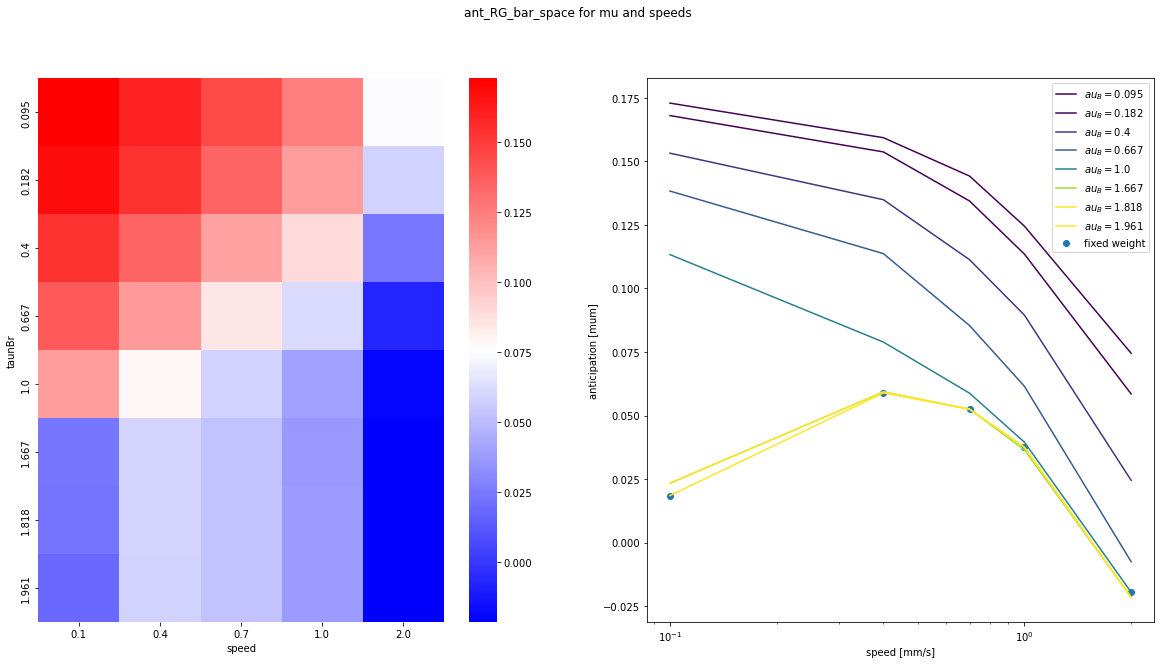

In [75]:
fig = plt.figure(figsize = (20,10))
fig.tight_layout()
fig.suptitle(f'{var} for mu and speeds')


#weights = [0.0,10.0,50.0,100.0]

ax = fig.add_subplot(1,3,1)
# plot heatmap for beta
g_heatmap = df.pivot_table(index = 'taunBr',columns = 'speed',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, ax = ax, cmap = 'bwr')#,  vmin=-0.2, vmax=0.2)

subg = df.groupby(['taunBr'])
ax = fig.add_subplot(1,3,2)
ax.set_xscale('log')
for x,w2 in enumerate(subg.groups):
    sg = subg.get_group(w2)

    ax.plot(sg['speed'], sg[var], label = str(f'$\tau_B = {w2}$'),color = scalarMap.to_rgba(w2))
    #sg.plot( x = 'speed', y = 'ant_RG_drive_space', label =f'wBA = {w2}', ax = ax)

ax.scatter(speeds, data[net_AC]['ants']['RG_bar']*speeds, label = 'fixed weight')
#ax.scatter(speeds, data[net_pool]['ants']['RG_bar']*speeds)


ax.set_xlabel('speed [mm/s]')
ax.set_ylabel('anticipation [mum]')
ax.legend()


ax = fig.add_subplot(1,3,3)


Text(721.8235294117648, 0.5, '')

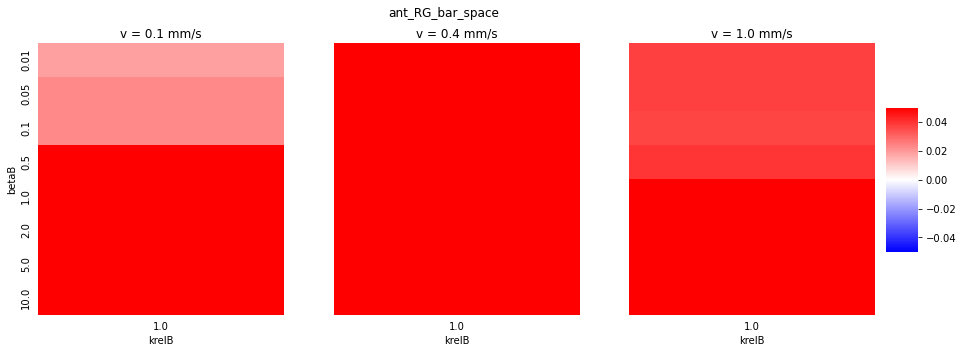

In [64]:

fig = plt.figure(figsize = (15,5))
fig.suptitle(f'{var}')

cbar_ax = fig.add_axes([.91, .3, .03, .4])

s = 0.1
ax = fig.add_subplot(131)
ax.set_title(f'v = {s} mm/s')
dfg = df.groupby('speed')
dfs = dfg.get_group(s)

# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'betaB',columns = 'krelB',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=-0.05, vmax=0.05, cbar=None)
ax.tick_params(left=False, bottom=False)


s = 0.4
ax = fig.add_subplot(132)
ax.set_title(f'v = {s} mm/s')
dfs = dfg.get_group(s)
# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'betaB',columns = 'krelB',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=-0.05, vmax=0.05, cbar=None, yticklabels=False)
ax.tick_params(left=False, bottom=False)
ax.set_ylabel('')

s = 1.0
ax = fig.add_subplot(133)
ax.set_title(f'v = {s} mm/s')
dfs = dfg.get_group(s)

# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'betaB',columns = 'krelB',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=-0.05, vmax=0.05, yticklabels=False, cbar_ax=cbar_ax)
ax.tick_params(left=False, bottom=False)
ax.set_ylabel('')


Text(721.8235294117648, 0.5, '')

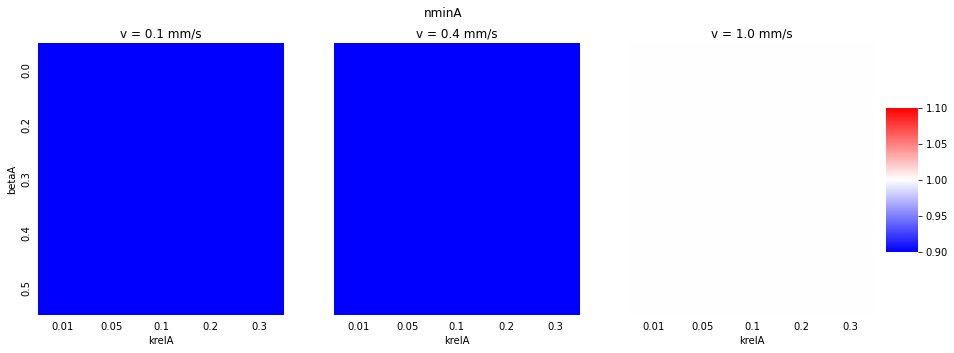

In [33]:
var = 'nminA'
fig = plt.figure(figsize = (15,5))
fig.suptitle(f'{var}')

cbar_ax = fig.add_axes([.91, .3, .03, .4])

s = 0.1
ax = fig.add_subplot(131)
ax.set_title(f'v = {s} mm/s')
dfg = df.groupby('speed')
dfs = dfg.get_group(s)

# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'betaA',columns = 'krelA',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax, cbar=None)
ax.tick_params(left=False, bottom=False)


s = 0.4
ax = fig.add_subplot(132)
ax.set_title(f'v = {s} mm/s')
dfs = dfg.get_group(s)
# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'betaA',columns = 'krelA',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax, cbar=None, yticklabels=False)
ax.tick_params(left=False, bottom=False)
ax.set_ylabel('')

s = 1.0
ax = fig.add_subplot(133)
ax.set_title(f'v = {s} mm/s')
dfs = dfg.get_group(s)

# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'betaA',columns = 'krelA',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax, yticklabels=False, cbar_ax=cbar_ax)
ax.tick_params(left=False, bottom=False)
ax.set_ylabel('')


In [ ]:
# calculate time bar spends in rf 